In [28]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import ruptures as rpt


In [8]:
def convertDF(path): 
    '''converting a dataframe to a new datafrom with float, 5 decimal places and '''

    # reading in file, and skipping top row
    df = pd.read_csv(path, skiprows=1)

    # defining the titles of the rows
    body_loc = df.columns.tolist()

    # creating new empty dataframe
    df_new = pd.DataFrame()


    for part in body_loc:
        if part == 'bodyparts' or '.2' in part:
            continue
        else:
            df_new[part] = pd.to_numeric(df[part].iloc[1:], errors='coerce').dropna().round(5).astype(float)


    return df_new

In [9]:
convertDF(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv')

,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


In [10]:
# defining my path to pt one
IO_03_09_2023_RSTN = Path(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder')

# list of all the videos for this specific patient (c1s is missing for this patient)
dbs_loc = ['b1f', 'b1s', 'b2f', 'b2s', 'b3f', 'b3s', 'c1f', 'c1s', 'c2s', 'c3f', 'c3s', 't1f', 't1s', 't2f', 't2s', 't3f', 't3s']

# place to store all the df
dataframes = {}

files = list(IO_03_09_2023_RSTN.iterdir())

# iterating over each file for pt 1 and converting the df to floats and cleaning up the data
for file, label in zip(IO_03_09_2023_RSTN.iterdir(), dbs_loc):
    dataframes[label] = convertDF(file)
    print(f"{label} loaded from {file.name}")


b1f loaded from 20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b1s loaded from 20230309_b1_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2f loaded from 20230309_b2_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2s loaded from 20230309_b2_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3f loaded from 20230309_b3_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3s loaded from 20230309_b3_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1f loaded from 20230309_c1_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1s loaded from 20230309_c2_d2p0_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c2s loaded from 20230309_c2_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c3f lo

In [11]:
dataframes['b1f']


,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


b1f MCP1 (X) — Change points: [1730, 4258]
b1f MCP1.1 (Y) — Change points: [1745, 2515, 3210, 4010, 4258]
b1s MCP1 (X) — Change points: [550, 565, 675, 690, 945, 960, 1825, 1875, 2765, 3550, 4365, 4380, 4556]
b1s MCP1.1 (Y) — Change points: [725, 765, 1210, 1265, 2800, 3510, 4556]


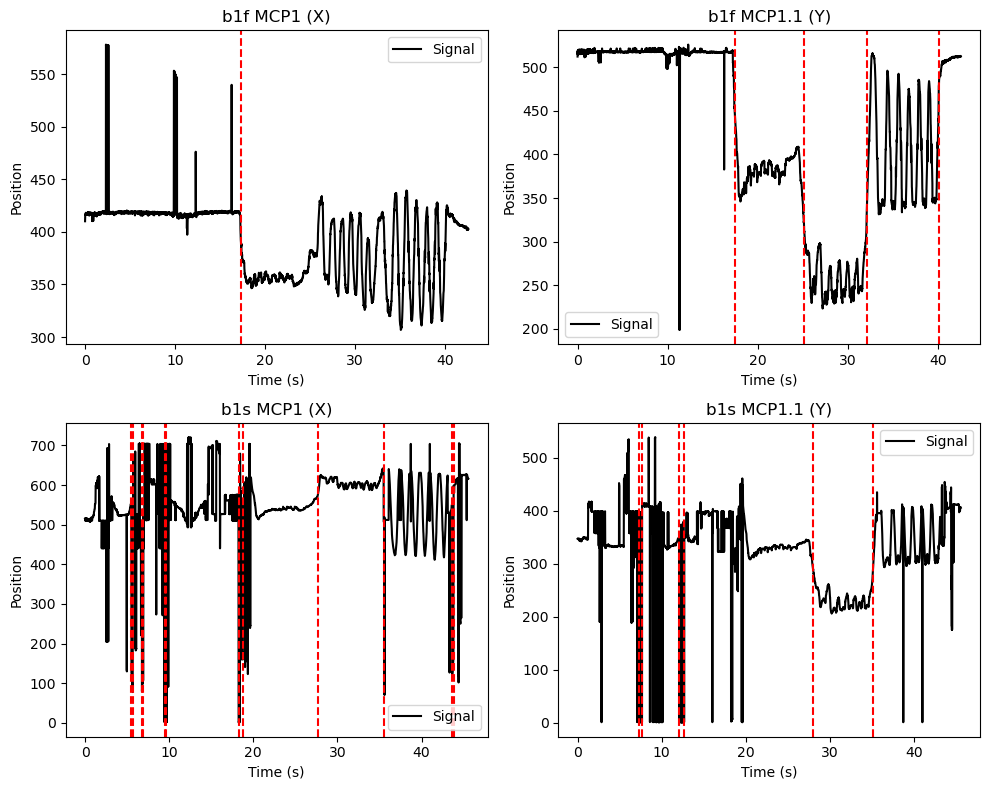

In [111]:
# Pulling data from the dataframe
b1f = dataframes['b1f']
b1s = dataframes['b1s']
xf = b1f['MCP1']
yf = b1f['MCP1.1']
xs = b1s['MCP1']
ys = b1s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['b1f MCP1 (X)', 'b1f MCP1.1 (Y)', 'b1s MCP1 (X)', 'b1s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()


b2f MCP1 (X) — Change points: [3271]
b2f MCP1.1 (Y) — Change points: [400, 1345, 2155, 2960, 3271]
b2s MCP1 (X) — Change points: [270, 1270, 2180, 3223]
b2s MCP1.1 (Y) — Change points: [335, 1345, 2155, 2945, 2985, 3223]


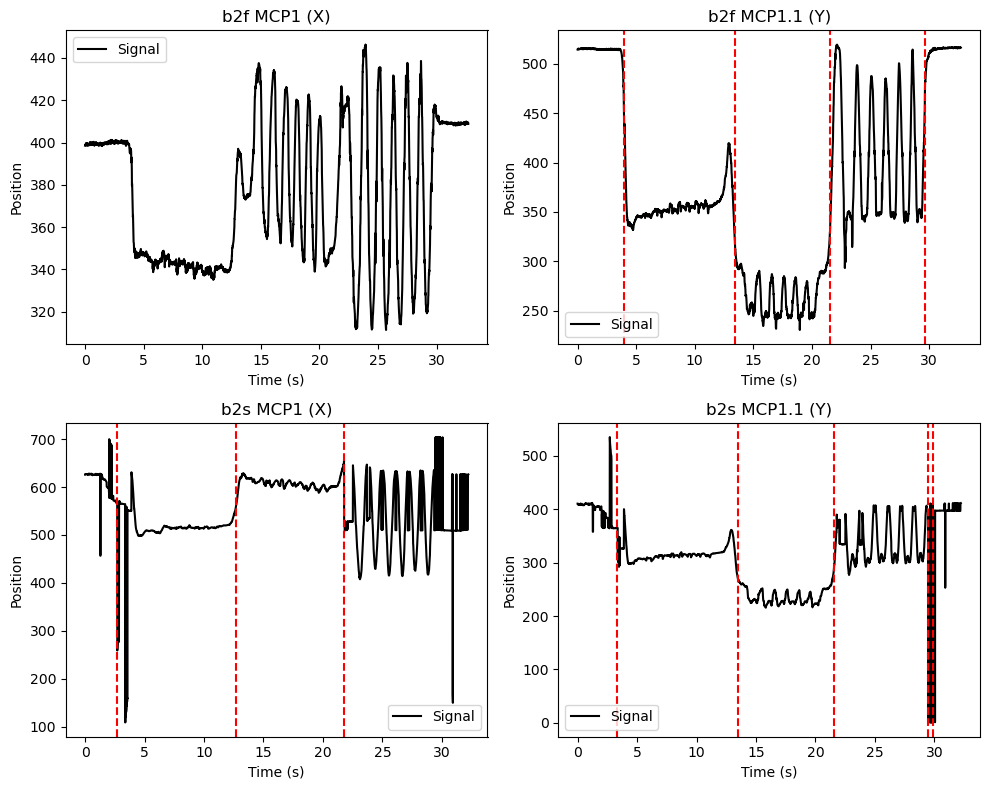

In [108]:
# Pulling data from the dataframe
b2f = dataframes['b2f']
b2s = dataframes['b2s']
xf = b2f['MCP1']
yf = b2f['MCP1.1']
xs = b2s['MCP1']
ys = b2s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['b2f MCP1 (X)', 'b2f MCP1.1 (Y)', 'b2s MCP1 (X)', 'b2s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()


c1f MCP1 (X) — Change points: [245, 265, 720, 785, 2230, 3715, 4550, 4635, 4936]
c1f MCP1.1 (Y) — Change points: [690, 1480, 2280, 3465, 4595, 4635, 4936]
c1s MCP1 (X) — Change points: [3013]
c1s MCP1.1 (Y) — Change points: [500, 1300, 1975, 2720, 3013]


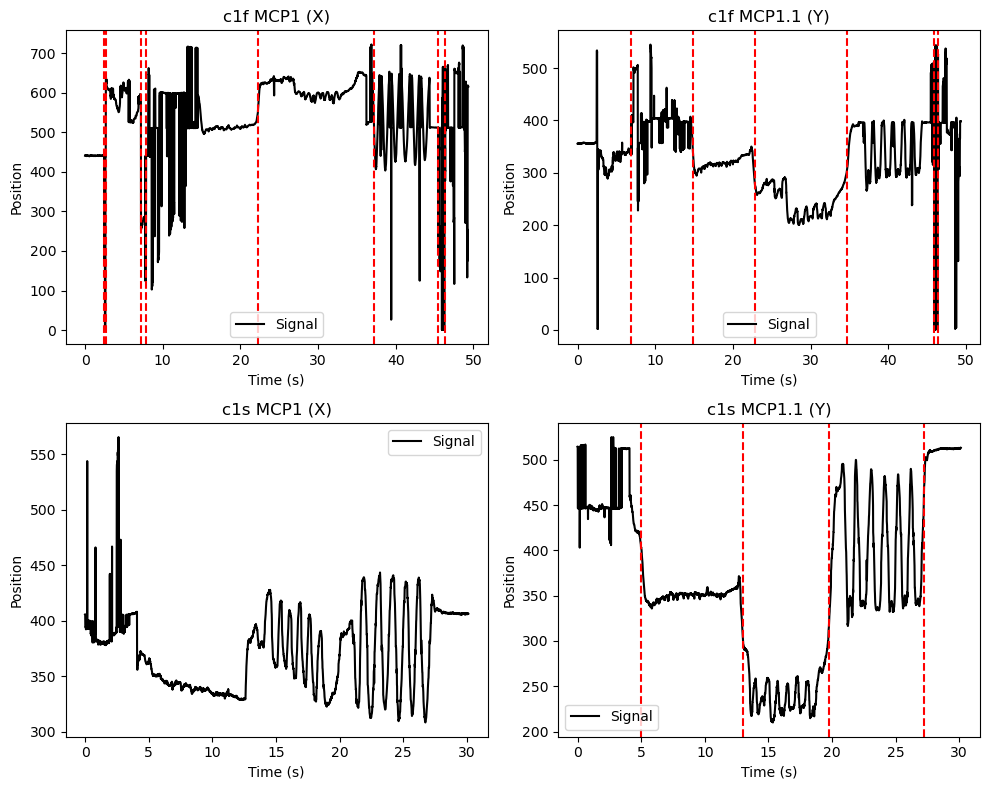

In [119]:
# Pulling data from the dataframe
c1f = dataframes['c1f']
c1s = dataframes['c1s']
xf = c1f['MCP1']
yf = c1f['MCP1.1']
xs = c1s['MCP1']
ys = c1s['MCP1.1']

views = [xf, yf, xs, ys]
titles = ['c1f MCP1 (X)', 'c1f MCP1.1 (Y)', 'c1s MCP1 (X)', 'c1s MCP1.1 (Y)']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, (view, title) in enumerate(zip(views, titles)):
    length = len(view)
    step = 0.01  # 100 FPS
    t = np.linspace(0, (length - 1) * step, length)

    
    data_np = view.to_numpy()
    
    # Run PELT algorithm
    algo = rpt.Pelt(model="l2").fit(data_np)
    result = algo.predict(pen=1e6)
    
    print(f"{title} — Change points:", result)
    
    # Plot data
    axs[i].plot(t, data_np, color='black', label='Signal')
    
    # Plot detected change points
    for cp in result:
        if cp < len(t):
            axs[i].axvline(t[cp], color='red', linestyle='--')
    
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Position')
    axs[i].legend()

plt.tight_layout()
plt.show()

In [115]:
df_indices = pd.DataFrame(columns=['dataset', 'change_points'])

for df_name in dataframes:
    if 'f' in df_name:
        data = dataframes[df_name]
        points = data['MCP1.1']
        points_np = points.to_numpy()

        algo = rpt.Pelt(model='l2').fit(points_np)
        results = algo.predict(pen=1e6)

        new_row = pd.DataFrame([{
            'dataset': df_name,
            'change_points': results
        }])

        df_indices = pd.concat([df_indices, new_row], ignore_index=True)


In [116]:
df_indices

,dataset,change_points
0,b1f,"[1745, 2515, 3210, 4010, 4258]"
1,b2f,"[400, 1345, 2155, 2960, 3271]"
2,b3f,"[345, 1255, 2065, 2845, 3053]"
3,c1f,"[690, 1480, 2280, 3465, 4595, 4635, 4936]"
4,c3f,"[565, 1365, 2325, 3105, 3368]"
5,t1f,[619]
6,t2f,[498]
7,t3f,"[305, 1320, 2175, 2400, 3110, 3575]"


In [ ]:
for index, row in df_indices.iterrows():
    segment_name = row['dataset']
    change_points = row['change_points']

    for i in range(len(change_points)):
        hand_OC = segment_name[change_points[i]:result[i+1]]
        hand_OC = segment_name[change_points[i]:result[i+1]]
        arm_EF = segment_name[change_points[i]:result[i+1]]


hand_OC = x[result[0]:result[1]]
hand_PS = x[result[1]:result[2]]
arm_EF = x[result[2]:]

t_hand_OC = t[result[0]:result[1]]
t_hand_PS = t[result[1]:result[2]]
t_arm_EF = t[result[2]:]

plt.plot(t_hand_OC, hand_OC)
plt.show
plt.plot(t_hand_PS, hand_PS)
plt.show
plt.plot(t_arm_EF, arm_EF)

## b1f MCP1 x

Detected change points: [245, 265, 720, 785, 2230, 3715, 4550, 4635, 4936]


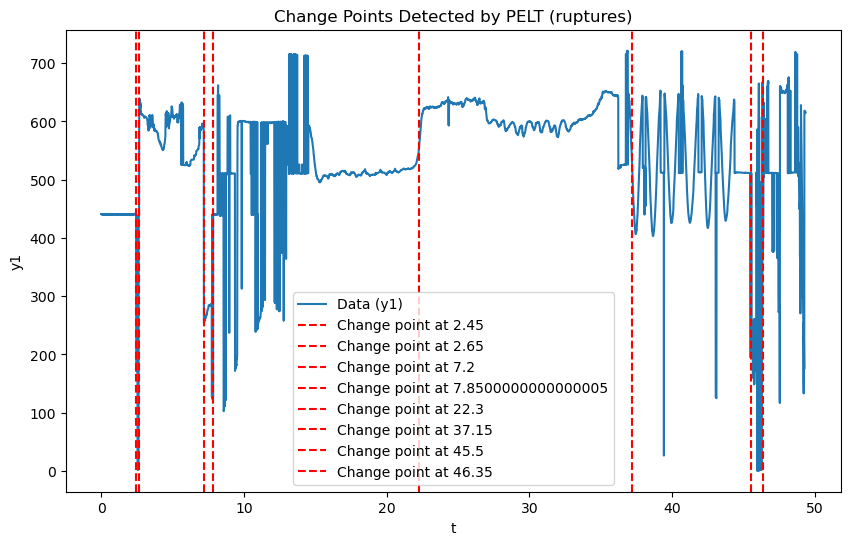

In [117]:
# pulling data from the dataframe
c1f = dataframes['c1f']
x = c1f['MCP1']

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
x_np = x.to_numpy() if hasattr(x, 'to_numpy') else x

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(x_np)
result = algo.predict(pen=1000000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

## b1f MCP1 y

Detected change points: [1745, 2515, 3210, 4010, 4258]


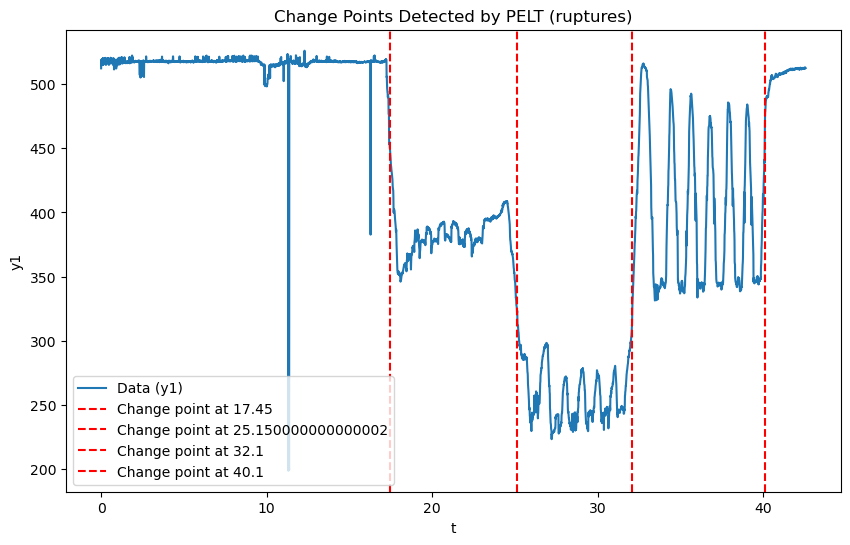

In [121]:
# pulling data from the dataframe
b1f = dataframes['b1f']
x = b1f['MCP1.1']

# defining time
length = len(x)
# time step
step = 0.01 #  video frame rate = 100 fps, so the timestep b/t frames is 0.01 seconds or 10ms

t = np.arange(0, length * step, step)

# Assuming t and y1 are pandas Series or lists
# Convert y1 to numpy array
x_np = x.to_numpy() if hasattr(x, 'to_numpy') else x

# Run PELT on numpy array
algo = rpt.Pelt(model="l2").fit(x_np)
result = algo.predict(pen=1000000)

print("Detected change points:", result)

# Plot your data with change points
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='Data (y1)')
for cp in result:
    if cp < len(t):
        plt.axvline(t[cp], color='r', linestyle='--', label=f'Change point at {t[cp]}')

plt.title('Change Points Detected by PELT (ruptures)')
plt.xlabel('t')
plt.ylabel('y1')
plt.legend()
plt.show()

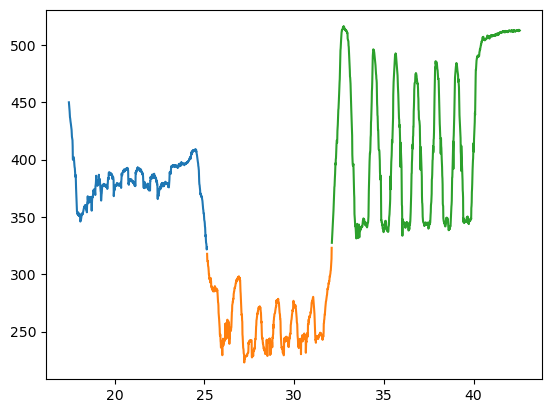

In [122]:
hand_OC = x[result[0]:result[1]]
hand_PS = x[result[1]:result[2]]
arm_EF = x[result[2]:]

t_hand_OC = t[result[0]:result[1]]
t_hand_PS = t[result[1]:result[2]]
t_arm_EF = t[result[2]:]

plt.plot(t_hand_OC, hand_OC)
plt.show
plt.plot(t_hand_PS, hand_PS)
plt.show
plt.plot(t_arm_EF, arm_EF)

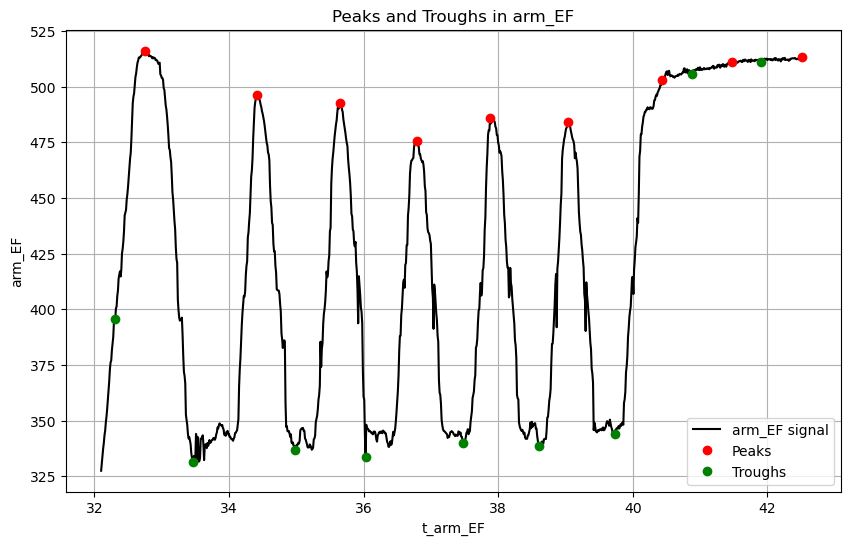

[3275. 3441. 3565. 3679. 3788. 3904. 4044. 4147. 4252.]
[3231. 3346. 3498. 3603. 3748. 3861. 3973. 4088. 4190.]


In [71]:
t_np = np.asarray(t_arm_EF)
y_np = np.asarray(arm_EF)

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')
plt.title('Peaks and Troughs in arm_EF')
plt.xlabel('t_arm_EF')
plt.ylabel('arm_EF')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


[32.77 34.45 35.67 36.83 37.96 39.07] [34.42 35.65 36.76 37.92 39.02 40.19]


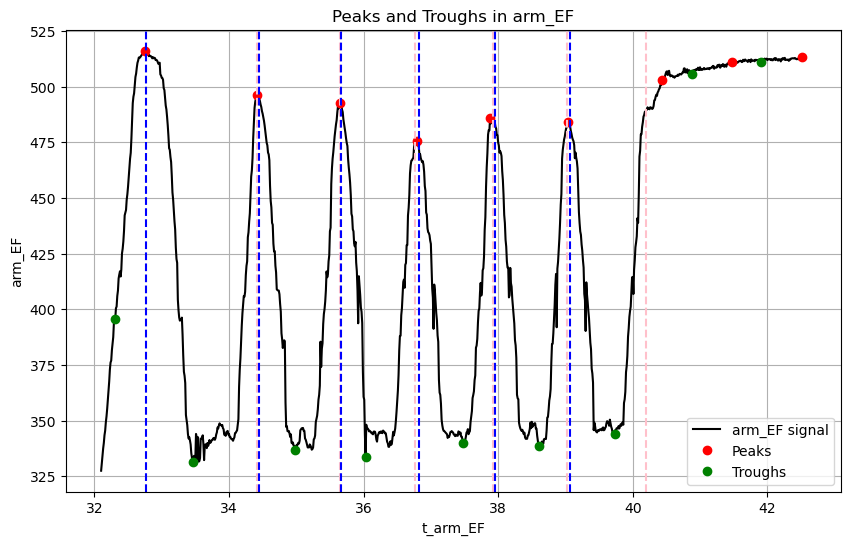

[3275. 3441. 3565. 3679. 3788. 3904. 4044. 4147. 4252.]
[3231. 3346. 3498. 3603. 3748. 3861. 3973. 4088. 4190.]


In [82]:
t_np = np.asarray(t_arm_EF)
y_np = np.asarray(arm_EF)

manual_peak_points = [3277,3445,3567,3683,3796,3907]
manual_trough_points = [3442,3565,3676,3792,3902,4019]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')
plt.title('Peaks and Troughs in arm_EF')
plt.xlabel('t_arm_EF')
plt.ylabel('arm_EF')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)



[25.72 26.95 28.12 29.14 30.07 31.06] [26.77 28.03 29.08 30.01 30.88 31.93]


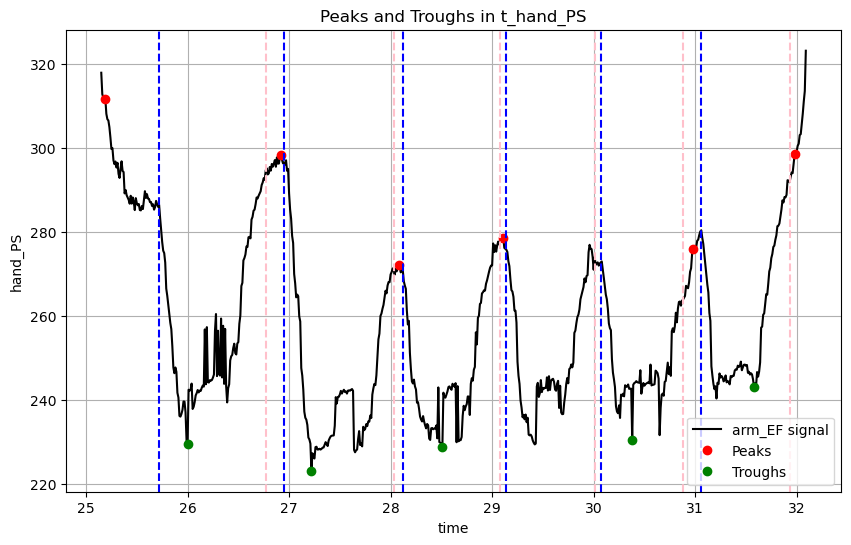

[3214. 3387. 3503. 3606. 3793. 3893.]
[3295. 3417. 3546. 3733. 3853.]


In [103]:
t_np = np.asarray(t_hand_PS)
y_np = np.asarray(hand_PS)

manual_peak_points = [2572,2695,2812,2914,3007,3106]
manual_trough_points = [2677,2803,2908,3001,3088,3193]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.title('Peaks and Troughs in t_hand_PS')
plt.xlabel('time')
plt.ylabel('hand_PS')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


[18.38 18.89 19.5  20.28 21.03 21.87] [18.86 19.32 20.1  20.91 21.72 22.56]


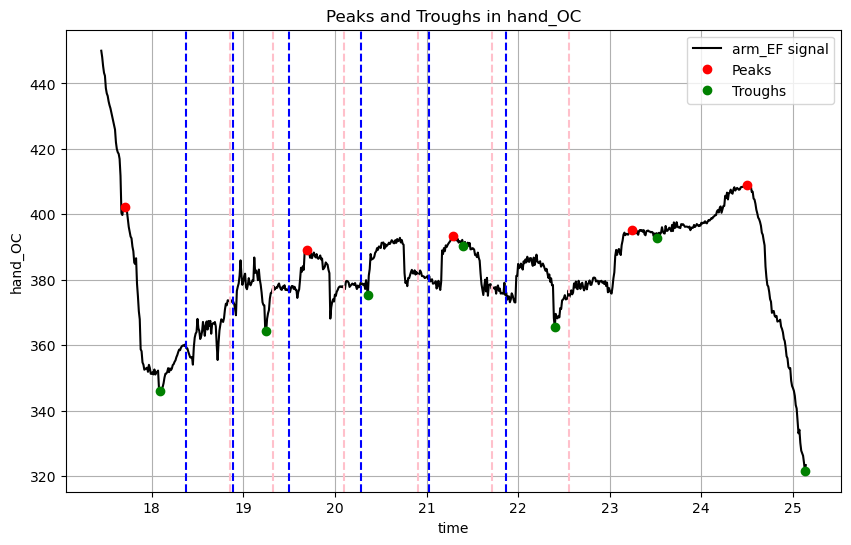

[3236. 3435. 3594. 3789. 3915.]
[3274. 3390. 3501. 3605. 3705. 3817. 3978.]


In [104]:
t_np = np.asarray(t_hand_OC)
y_np = np.asarray(hand_OC)

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

scaled_peaks = np.array(manual_peak_points) * 0.01
scaled_troughs = np.array(manual_trough_points) * 0.01

peaks, _ = find_peaks(y_np, distance=100)
troughs, _ = find_peaks(-y_np, distance=100)

print(scaled_peaks, scaled_troughs)

plt.figure(figsize=(10, 6))
plt.plot(t_np, y_np, color='black', label='arm_EF signal')
plt.plot(t_np[peaks], y_np[peaks], 'ro', label='Peaks')
plt.plot(t_np[troughs], y_np[troughs], 'go', label='Troughs')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')

plt.title('Peaks and Troughs in hand_OC')
plt.xlabel('time')
plt.ylabel('hand_OC')
plt.legend()
plt.grid(True)
plt.show()

print(t_arm_EF[peaks]/.01)
print(t_arm_EF[troughs]/.01)


800
770


ValueError: x and y must have same first dimension, but have shapes (770,) and (800,)

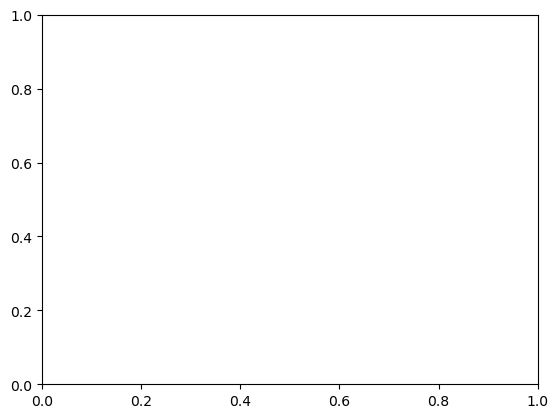

In [120]:
b1f = dataframes['b1f']
MCP1x = b1f['MCP1']
MCP1y = b1f['MCP1.1']
MCP2x = b1f['MCP2']
MCP2y = b1f['MCP2.1']



# Element-wise subtraction: col1 - col2
euc_dis_x = np.abs(MCP1x-MCP2x)
euc_dis_y = np.abs(MCP1y-MCP2y)

ed_x = euc_dis_x[result[0]:result[1]]
ed_y = euc_dis_y[result[0]:result[1]]

manual_peak_points = [1838,1889,1950,2028,2103,2187]
manual_trough_points = [1886,1932,2010,2091,2172,2256]

print(len(ed_x))
print(len(t_hand_OC))


plt.plot(t_hand_OC, ed_x, label = 'euc distance x')
plt.plot(t_hand_OC, ed_y, label = 'euc distance y')

for i in range(0,6):
    plt.axvline(scaled_peaks[i], linestyle = '--', color = 'blue')
    plt.axvline(scaled_troughs[i], linestyle = '--', color = 'pink')